In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os, glob
from PIL import Image

import PIL
from PIL import Image
import torch
import torchvision
from torch.utils.data import  TensorDataset, DataLoader
import torchvision.transforms as transforms
from keras.preprocessing.image import img_to_array

In [2]:
#파일 경로 가져오기
PATH = './train/'

image_dirs = os.listdir(PATH)
image_paths = dict()
for image_dir in tqdm(image_dirs):
    try:
        #png파일이 섞여 있어서 먼저 png 처리
        files = glob.glob(PATH + image_dir + "/*.png")
        image_paths[image_dir] = [file for file in files]
    except:
        FileNotFoundError

#png 파일 jpg로 변환
for label,paths in tqdm(image_paths.items()):
    for path in paths:
        fname = path[:-4]
        img = Image.open(path)
        new_img = img.convert('RGB')
        new_img.save(fname + ".jpg", "JPEG")

100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 1422.04it/s]


In [9]:
def to_jpg(PATH):
    
    image_dirs = os.listdir(PATH)
    image_paths = dict()
    for image_dir in tqdm(image_dirs):
        try:
            #png파일이 섞여 있어서 먼저 png 처리
            files = glob.glob(PATH + image_dir + "/*.png")
            image_paths[image_dir] = [file for file in files]
        except:
            FileNotFoundError

    #png 파일 jpg로 변환 후 삭제
    for label,paths in tqdm(image_paths.items()):
        for path in paths:
            fname = path[:-4]
            img = Image.open(path)
            new_img = img.convert('RGB')
            new_img.save(fname + ".jpg", "JPEG")
            
            if os.path.isfile(path):
                os.remove(path)
            else:    ## Show an error ##
                print("Error: %s file not found" % myfile)
    

In [10]:
to_jpg('./dataset/')

 25%|█████████████████████                                                               | 1/4 [00:00<00:00,  4.21it/s]C:\Users\develreto\AppData\Local\Programs\Python\Python39\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  7.20it/s]


In [ ]:
def get_jpg(PATH):
    PATH = PATH
    image_dirs = os.listdir(PATH)
    image_paths = dict()

    # png->jpg 포함 모든 jpg 불러오기
    for image_dir in tqdm(image_dirs):
        try:
            files = glob.glob(PATH + image_dir+"/*.jpg")
            image_paths[image_dir] = [file for file in files]
        except:
            FileNotFoundError
            

            
            
    

In [8]:
image_paths

{'0 1차정상': ['./dataset/0 1차정상\\2-2.jpg',
  './dataset/0 1차정상\\2-3.jpg',
  './dataset/0 1차정상\\33.jpg',
  './dataset/0 1차정상\\R-24.jpg',
  './dataset/0 1차정상\\TEST4-5.jpg',
  './dataset/0 1차정상\\W1-011-A01-11.jpg',
  './dataset/0 1차정상\\W1-011-A01-12.jpg',
  './dataset/0 1차정상\\W1-011-A01-13.jpg',
  './dataset/0 1차정상\\W1-011-A01-14.jpg',
  './dataset/0 1차정상\\W1-011-A01-15.jpg',
  './dataset/0 1차정상\\W1-011-A01-16.jpg',
  './dataset/0 1차정상\\W1-011-A01-17.jpg',
  './dataset/0 1차정상\\W1-011-A01-18.jpg',
  './dataset/0 1차정상\\W1-011-A01-19.jpg',
  './dataset/0 1차정상\\W1-011-A01-20.jpg',
  './dataset/0 1차정상\\W1-011-A01-3.jpg',
  './dataset/0 1차정상\\W1-011-A01-5.jpg',
  './dataset/0 1차정상\\W1-011-A01-7.jpg',
  './dataset/0 1차정상\\W1-011-A01-9.jpg',
  './dataset/0 1차정상\\W1-011-A10-1.jpg',
  './dataset/0 1차정상\\W1-012-A02-251.jpg',
  './dataset/0 1차정상\\W1-012-A02-252.jpg',
  './dataset/0 1차정상\\W1-012-A02-256.jpg',
  './dataset/0 1차정상\\W1-013-A01-21.jpg',
  './dataset/0 1차정상\\W1-013-A01-22.jpg',
  './dataset/

In [6]:


#image transform
transform = transforms.Compose([
    transforms.Resize([120,120]),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

data = dict()
data['label'] = []
data['filename'] = []
data['image_arr'] = []
for label,paths in tqdm(image_paths.items()):
    for path in paths:
        img = Image.open(path)
        data['filename'].append(path)
        img_arr = img_to_array(transform(img)) #3,480,480
        img_arr = np.transpose(img_arr, (2,1,0)) # 480,480,3
        data['image_arr'].append(img_arr)
        data['label'].append(label)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  9.19it/s]


number of samples:  285
dict keys:  ['label', 'filename', 'image_arr']
image shape:  (120, 120, 3)
Original dataset shape
[('0 2차정상', 272), ('1 2차결함', 13)]


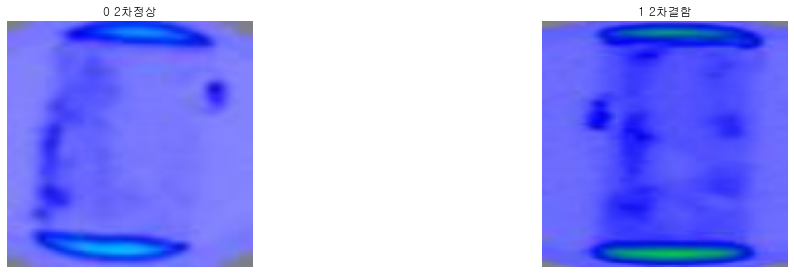

In [7]:
#파일 정보 확인 및 이미지 확인, data imbalance 확인 
from collections import Counter
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array,load_img

#한글 출력용 폰트지정
plt.rcParams["font.family"] = 'Gulim'

print('number of samples: ', len(data['image_arr']))
print('dict keys: ', list(data.keys()))
print('image shape: ', data['image_arr'][0].shape)
count_label = Counter(data['label'])
print('Original dataset shape')
print(sorted(count_label.items()))

#show images
fig, axes = plt.subplots(1, len(count_label.items()))
fig.set_size_inches(15,4)
fig.tight_layout()
 
for ax, label in zip(axes, np.unique(data['label'])):
    idx = data['label'].index(label)
    ax.imshow(array_to_img(data['image_arr'][idx]))
    ax.axis('off')
    ax.set_title(label)

C:\Users\develreto\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


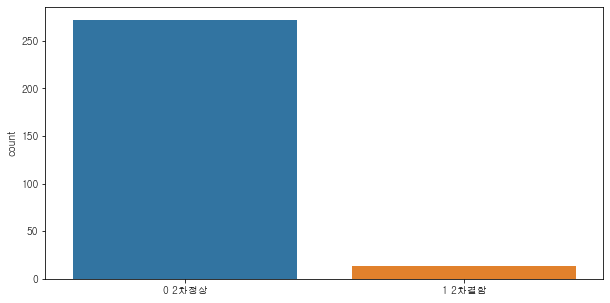

In [8]:
#imbalance 시각화
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(data['label'])
plt.show()

In [152]:
"""
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False, samplewise_center=False,
    featurewise_std_normalization=False, samplewise_std_normalization=False,
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
    height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0,
    channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
    horizontal_flip=False, vertical_flip=False, rescale=None,
    preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None
)


"""

"\ntf.keras.preprocessing.image.ImageDataGenerator(\n    featurewise_center=False, samplewise_center=False,\n    featurewise_std_normalization=False, samplewise_std_normalization=False,\n    zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,\n    height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0,\n    channel_shift_range=0.0, fill_mode='nearest', cval=0.0,\n    horizontal_flip=False, vertical_flip=False, rescale=None,\n    preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None\n)\n\n\n"

In [9]:
#generator 생성
data_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.3, 
                               height_shift_range=0.3,
                               rescale = 1.0/255, #rgb값을 normalize, 학습 효율적
                               shear_range=0.1, #distort
                               zoom_range = 0.2,
                               horizontal_flip = True,
                               fill_mode='nearest'
                              )

label_count = Counter(data['label'])
label_max = max(label_count.values())


i=0
for img,label in zip(data['image_arr'],data['label']):
    x = img
    x = x.reshape((1,)+x.shape)
    img_count = label_count[label] #현재 label을 가진 사진 수
    if img_count < label_max:
        i = label_max-img_count #해당 label에 대해 추가로 생성해야 하는 사진 수 (가장 많은 label의 사진 수에서 뺀 값)
        i = i//img_count #이 사진으로 만들어야 하는 보정 사진 수
        for batch in data_gen.flow(x,
                                 batch_size=1,
                                 save_to_dir=PATH+str(image_dirs[int(label[:1])]), #기존 dir에 생성.
                                 save_prefix='made_'+label[0],
                                 save_format='jpg'):
            i-=1
            if i<0:
                break

In [ ]:
#generator 생성
data_gen = ImageDataGenerator(rotation_range=30, #range 90도 단위로 처리 시험해볼것
                               width_shift_range=0.3, 
                               height_shift_range=0.3,
                               rescale = 1.0/255, #rgb값을 normalize, 학습 효율적
                               shear_range=0.1, #distort
                               zoom_range = 0.2,
                               horizontal_flip = True,
                               fill_mode='nearest'
                              )

label_count = Counter(data['label'])
label_max = max(label_count.values())

i=0
for img,label in zip(data['image_arr'],data['label']):
    x = img
    x = x.reshape((1,)+x.shape)
    img_count = label_count[label] #현재 label을 가진 사진 수
    if img_count < label_max:
        i = label_max-img_count #해당 label에 대해 추가로 생성해야 하는 사진 수 (가장 많은 label의 사진 수에서 뺀 값)
        i = i//img_count #이 사진으로 만들어야 하는 보정 사진 수
        for batch in data_gen.flow(x,
                                 batch_size=1,
                                 save_to_dir=PATH+str(image_dirs[int(label[:1])]), #기존 dir에 생성.
                                 save_prefix='made_'+label[0],
                                 save_format='jpg'):
            i-=1
            if i<0:
                break

In [ ]:
label_count = Counter(data['label'])
label_max = max(label_count.values())

In [107]:
label_max

304

In [113]:
test = data['image_arr'][0]

In [114]:
test2 = test.reshape((1,) + test.shape)

In [116]:
test

array([[[ 0.00392163,  0.00392163,  0.00392163],
        [ 0.00392163,  0.00392163,  0.00392163],
        [ 0.00392163,  0.00392163,  0.00392163],
        ...,
        [-0.01960784,  0.0196079 , -0.03529412],
        [-0.01960784,  0.0196079 , -0.03529412],
        [-0.01960784,  0.0196079 , -0.03529412]],

       [[-0.00392157, -0.00392157,  0.05098045],
        [-0.00392157, -0.00392157,  0.05098045],
        [ 0.00392163, -0.00392157,  0.04313731],
        ...,
        [-0.00392157,  0.01176476, -0.01176471],
        [-0.00392157,  0.01176476, -0.01176471],
        [-0.00392157,  0.01176476, -0.01176471]],

       [[-0.01960784, -0.02745098,  0.13725495],
        [-0.01960784, -0.02745098,  0.13725495],
        [-0.01176471, -0.01960784,  0.12941182],
        ...,
        [ 0.00392163, -0.00392157,  0.02745104],
        [ 0.00392163, -0.00392157,  0.02745104],
        [ 0.00392163, -0.00392157,  0.02745104]],

       ...,

       [[ 0.01176476, -0.03529412,  0.01176476],
        [ 0

In [115]:
test2

array([[[[ 0.00392163,  0.00392163,  0.00392163],
         [ 0.00392163,  0.00392163,  0.00392163],
         [ 0.00392163,  0.00392163,  0.00392163],
         ...,
         [-0.01960784,  0.0196079 , -0.03529412],
         [-0.01960784,  0.0196079 , -0.03529412],
         [-0.01960784,  0.0196079 , -0.03529412]],

        [[-0.00392157, -0.00392157,  0.05098045],
         [-0.00392157, -0.00392157,  0.05098045],
         [ 0.00392163, -0.00392157,  0.04313731],
         ...,
         [-0.00392157,  0.01176476, -0.01176471],
         [-0.00392157,  0.01176476, -0.01176471],
         [-0.00392157,  0.01176476, -0.01176471]],

        [[-0.01960784, -0.02745098,  0.13725495],
         [-0.01960784, -0.02745098,  0.13725495],
         [-0.01176471, -0.01960784,  0.12941182],
         ...,
         [ 0.00392163, -0.00392157,  0.02745104],
         [ 0.00392163, -0.00392157,  0.02745104],
         [ 0.00392163, -0.00392157,  0.02745104]],

        ...,

        [[ 0.01176476, -0.03529412,  0

In [117]:
check_label = data['label'][0]

'0 1차정상'

In [119]:
label_count

Counter({'0 1차정상': 304, '1 1차결함': 9, '2 2차정상': 300, '3 2차결함': 13})

In [118]:
test_count = label_count[check_label]
test_count

NameError: name 'check_label' is not defined

In [134]:
label_count = Counter(data['label'])
label_max = max(label_count.values())

i=0

for img,label in zip(data['image_arr'],data['label']):
    x = img
    x = x.reshape((1,)+x.shape)
    img_count = label_count[label] #현재 label을 가진 사진 수

    if img_count <= label_max:
        i = label_max-img_count #해당 label에 대해 추가로 생성해야 하는 사진 수 (가장 많은 label의 사진 수에서 뺀 값)
        i = i//img_count #이 사진으로 만들어야 하는 보정 사진 수
        for batch in data_gen.flow(x,
                                 batch_size=1,
                                 save_to_dir=PATH+str(image_dirs[int(label[:1])]), #기존 dir에 생성.
                                 save_prefix='made_'+label[0],
                                 save_format='jpg'):
            i-=1
            if i<0:
                break
    

In [ ]:
if img_count < label_max:
        i = label_max-img_count #해당 label에 대해 추가로 생성해야 하는 사진 수 (가장 많은 label의 사진 수에서 뺀 값)
        i = i//img_count #이 사진으로 만들어야 하는 보정 사진 수
        for batch in data_gen.flow(x,
                                 batch_size=1,
                                 save_to_dir=PATH+str(image_dirs[int(label[:1])]), #기존 dir에 생성.
                                 save_prefix='made_'+label[0],
                                 save_format='jpg'):
            i-=1
            if i<0:
                break

In [ ]:

if img_count <= 14:
    i = label_max-img_count #해당 label에 대해 추가로 생성해야 하는 사진 수 (가장 많은 label의 사진 수에서 뺀 값)
    i = i//img_count #이 사진으로 만들어야 하는 보정 사진 수
    for batch in data_gen.flow(x,
                                batch_size=1,
                                save_to_dir=PATH+str(image_dirs[int(label[:1])]), #기존 dir에 생성.
                                save_prefix='made_'+label[0],
                                save_format='jpg'):
        i-=1
        if i<0:
                break
    

In [155]:
data_gen.flow

<bound method ImageDataGenerator.flow of <keras.preprocessing.image.ImageDataGenerator object at 0x000001AB01FDEFA0>>